In [14]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [15]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('./sp500_all_5y.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_apple = data[data.Ticker == 'AAPL']
stock_jpmorgan = data[data.Ticker == 'JPM']
stock_pfizer = data[data.Ticker == 'PFE']
df_apple = stock_apple['Close']
df_jpmorgan = stock_jpmorgan['Close']
df_pfizer = stock_pfizer['Close']

<Figure size 720x432 with 0 Axes>

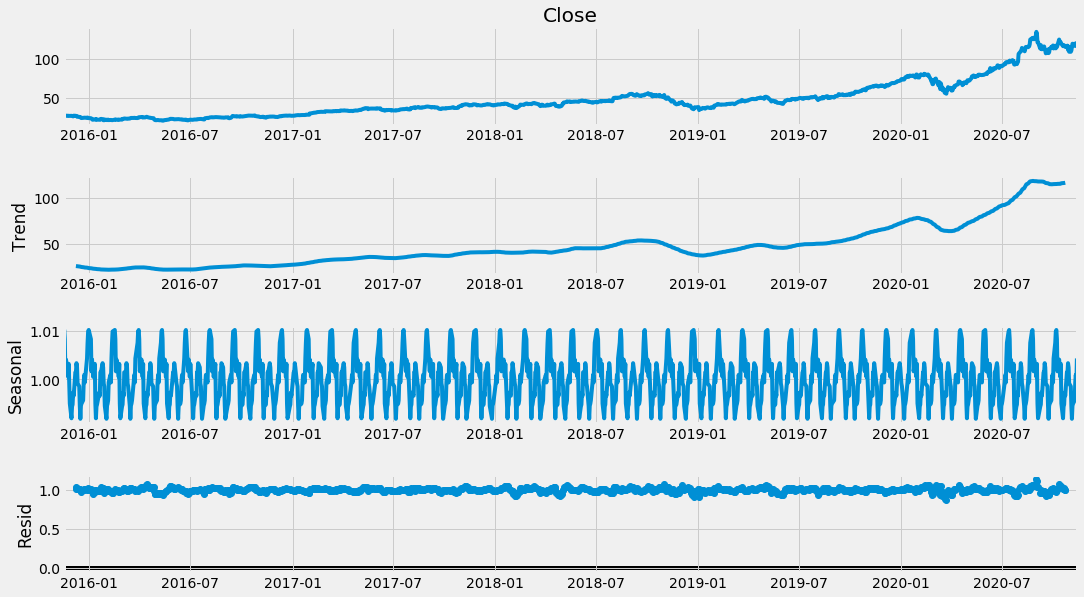

In [16]:
result = seasonal_decompose(df_apple, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [22]:
def get_train_test_data(df):
    df_log = np.log(df)
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    return train_data, test_data

train_data_apple, test_data_apple = get_train_test_data(df_apple)

In [23]:
apple_model_autoARIMA = auto_arima(train_data_apple, start_p=0, start_q=0,test='adf',max_p=5,max_q=3,max_d=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
print(apple_model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-5841.477, BIC=-5831.419, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-5856.827, BIC=-5841.740, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-5856.049, BIC=-5840.962, Fit time=0.025 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-5855.144, BIC=-5835.028, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-5855.146, BIC=-5835.029, Fit time=0.101 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-5868.393, BIC=-5843.248, Fit time=0.331 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-5872.535, BIC=-5842.361, Fit time=0.501 seconds
Fit ARIMA: order=(3, 1, 0); AIC=-5853.162, BIC=-5828.016, Fit time=0.057 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-5905.796, BIC=-5870.592, Fit time=0.789 seconds
Fit ARIMA: order=(4, 1, 3); AIC=-5902.815, BIC=-5857.553, Fit time=1.083 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-5907.764, BIC=-5877.589, Fit time=0.519 seconds
Fit ARIMA: order=(2, 1, 3); AIC=-5905.803, BIC=-5870.599, Fit time=0.638 seconds
Fit ARIMA: order=(3, 1, 3); 

In [24]:
apple_model = ARIMA(train_data_apple, order=(3, 2, 2))  
apple_fitted = apple_model.fit(disp=-1)  

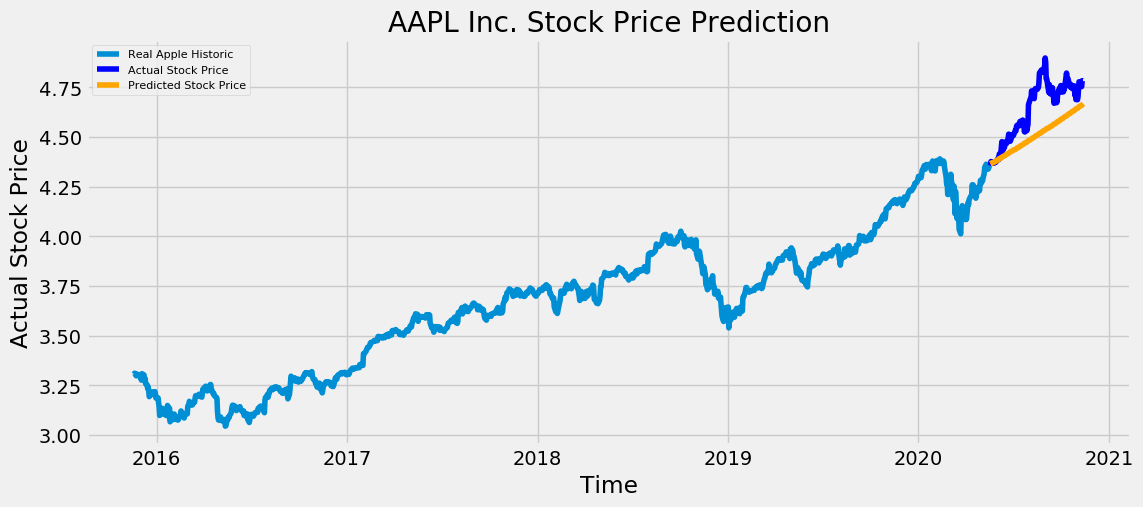

In [27]:
# Forecast
fc, se, conf = apple_fitted.forecast(126, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_apple.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_apple, label='Real Apple Historic')
plt.plot(test_data_apple, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('AAPL Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [26]:
# report performance
mse = mean_squared_error(test_data_apple, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_apple, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_apple, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data_apple)/np.abs(test_data_apple))
print('MAPE: '+str(mape))

MSE: 0.024137273386754806
MAE: 0.13103708041756587
RMSE: 0.15536175007624883
MAPE: 0.027781724347821623


In [34]:
train_data_jpmorgan, test_data_jpmorgan = get_train_test_data(df_jpmorgan)

In [35]:
jpmorgan_model_autoARIMA = auto_arima(train_data_jpmorgan, start_p=0, start_q=0,test='adf',max_p=5,max_q=3,max_d=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
print(jpmorgan_model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-5814.913, BIC=-5804.854, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-5856.520, BIC=-5841.433, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-5848.378, BIC=-5833.291, Fit time=0.022 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-5865.015, BIC=-5844.898, Fit time=0.063 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-5863.623, BIC=-5838.477, Fit time=0.204 seconds
Fit ARIMA: order=(3, 1, 1); AIC=-5912.073, BIC=-5881.899, Fit time=0.395 seconds
Fit ARIMA: order=(4, 1, 1); AIC=-5918.141, BIC=-5882.938, Fit time=0.683 seconds
Fit ARIMA: order=(4, 1, 0); AIC=-5886.222, BIC=-5856.048, Fit time=0.184 seconds
Fit ARIMA: order=(4, 1, 2); AIC=-5917.704, BIC=-5877.471, Fit time=0.781 seconds
Fit ARIMA: order=(3, 1, 0); AIC=-5865.364, BIC=-5840.219, Fit time=0.075 seconds
Fit ARIMA: order=(5, 1, 2); AIC=-5915.708, BIC=-5870.446, Fit time=1.035 seconds
Fit ARIMA: order=(5, 1, 1); AIC=-5916.443, BIC=-5876.210, Fit time=0.915 seconds
Total fit time: 4.408 second

In [54]:
jpmorgan_model = ARIMA(train_data_jpmorgan, order=(5, 1, 2))  
jpmorgan_fitted = jpmorgan_model.fit(disp=-1)

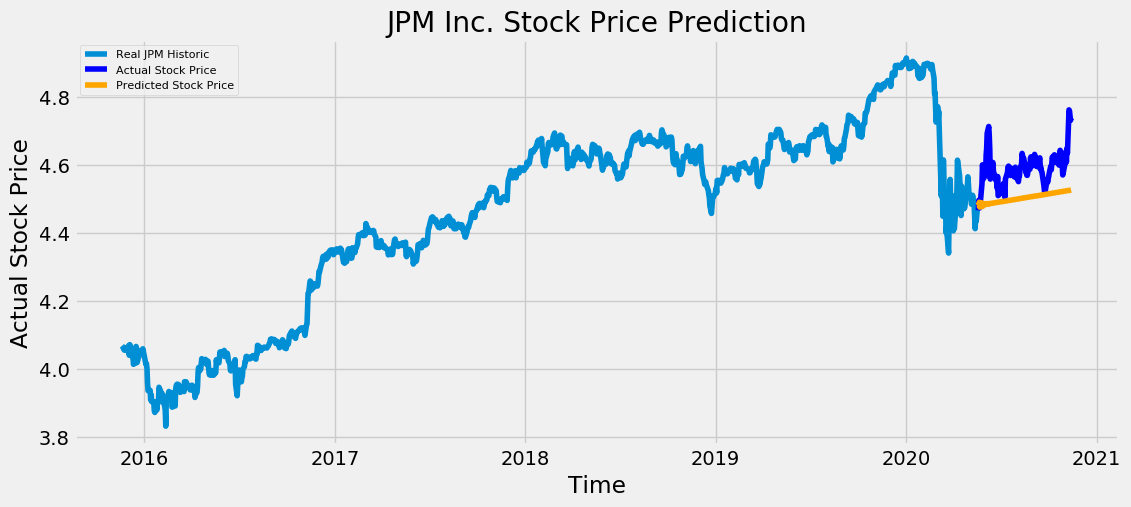

In [55]:
# Forecast
fc, se, conf = jpmorgan_fitted.forecast(126, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_jpmorgan.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_jpmorgan, label='Real JPM Historic')
plt.plot(test_data_jpmorgan, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('JPM Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [56]:
mse = mean_squared_error(test_data_jpmorgan, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_jpmorgan, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_jpmorgan, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data_jpmorgan)/np.abs(test_data_jpmorgan))
print('MAPE: '+str(mape))

MSE: 0.009733141607381516
MAE: 0.08682140521993952
RMSE: 0.09865668556859954
MAPE: 0.018809414096953796


In [57]:
train_data_pfizer, test_data_pfizer = get_train_test_data(df_pfizer)

In [58]:
pfizer_model_autoARIMA = auto_arima(train_data_pfizer, start_p=0, start_q=0,test='adf',max_p=5,max_q=3,max_d=3,m=1,d=None,seasonal=False,start_P=0, D=0, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
print(pfizer_model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0); AIC=-6536.953, BIC=-6526.895, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-6543.050, BIC=-6527.963, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-6542.525, BIC=-6527.438, Fit time=0.028 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-6541.961, BIC=-6521.845, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-6541.454, BIC=-6521.338, Fit time=0.085 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-6540.358, BIC=-6515.213, Fit time=0.213 seconds
Total fit time: 0.410 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1129
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3274.525
Method:                       css-mle   S.D. of innovations              0.013
Date:                Sun, 13 Dec 2020   AIC                          -6543.050
Time:                        21:23:18   BIC                          -6527.963
Sample:   

In [61]:
pfizer_model = ARIMA(train_data_pfizer, order=(1,1,1))  
pfizer_fitted = pfizer_model.fit(disp=-1)  

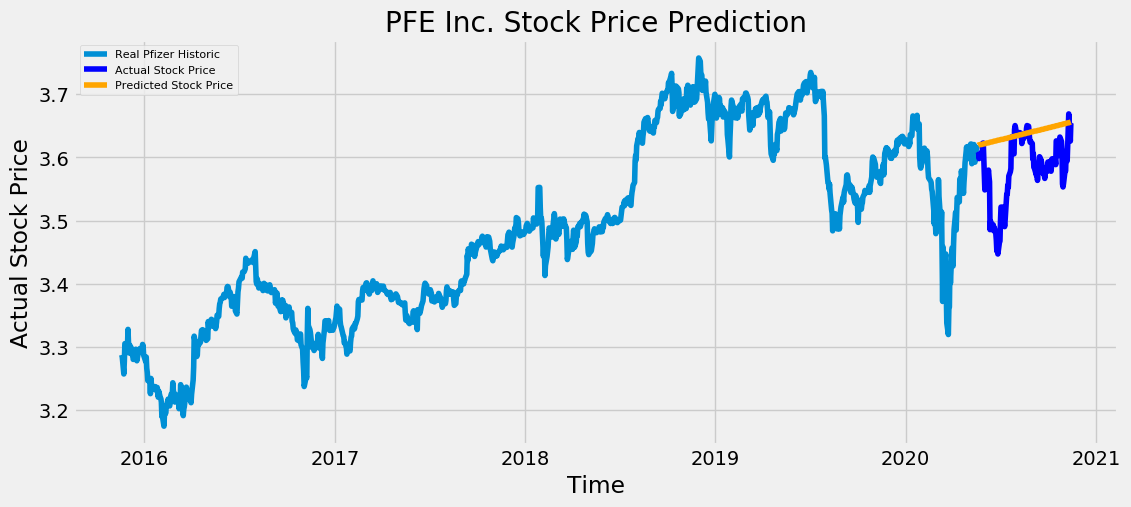

In [62]:
# Forecast
fc, se, conf = pfizer_fitted.forecast(126, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_pfizer.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_pfizer, label='Real Pfizer Historic')
plt.plot(test_data_pfizer, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('PFE Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [63]:
mse = mean_squared_error(test_data_pfizer, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_pfizer, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_pfizer, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data_pfizer)/np.abs(test_data_pfizer))
print('MAPE: '+str(mape))

MSE: 0.005284223024007322
MAE: 0.0559049297933142
RMSE: 0.07269266141783036
MAPE: 0.015791325447444278
